In [1]:
# tylko nowe cechy
# liczba nowych cech to połowa oryginalnych cech
# sqrt(n) zaokrąglony w góre
# klasyfikatory - zafiksowac sensowne ustawienia
# wagi sumowane do 1
# lecim po wszystkich zbiorach czemu nie
# k-fold cross validation
from multi_imbalance.datasets import load_datasets
import experiment_simpler_arch as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
for k in datasets:
    print(k)
    print(datasets[k]['data'][:3,:])
    print([np.unique(datasets[k]['data'][:,i]).size for i in range(datasets[k]['data'].shape[1])], datasets[k]['data'].shape[0])

1czysty-cut
[[211.53336007 208.76702627]
 [189.53670249  77.4191745 ]
 [181.78462832 148.69785931]]
[1200, 1200] 1200
2delikatne-cut
[[-15.82525427 -14.73927865]
 [280.3667336  -14.10018775]
 [ 85.10847553 -51.58454252]]
[1200, 1200] 1200
3mocniej-cut
[[ 206.61279752 -101.92831295]
 [ 252.63037866  294.08535685]
 [  31.33210152  254.16272716]]
[1200, 1200] 1200
4delikatne-bezover-cut
[[191.84693455 -31.18285044]
 [236.34631621 264.84234467]
 [ 86.67644876  24.25356988]]
[1200, 1200] 1200
balance-scale
[[1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [1. 1. 1. 3.]]
[5, 5, 5, 5] 625
cleveland
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    7. ]]
[41, 2, 4, 50, 152, 2, 3, 91, 2, 40, 3, 6, 5] 303
cleveland_v2
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  28

### One hot encoding for columns with less than 10 unique values

In [4]:
for k in datasets:
    df = pd.DataFrame(data=datasets[k]['data'])
    cutoff = 10

    encoded = pd.get_dummies(df, columns=df.columns[df.apply(pd.Series.nunique) < cutoff], drop_first=True)
    result_df = pd.concat([df, encoded], axis=1)
    datasets[k]['data'] = result_df.values

In [5]:
for k in datasets:
    print(k)
    print(datasets[k]['data'][:3,:])
    print([np.unique(datasets[k]['data'][:,i]).size for i in range(datasets[k]['data'].shape[1])], datasets[k]['data'].shape[0])

1czysty-cut
[[211.53336007 208.76702627 211.53336007 208.76702627]
 [189.53670249  77.4191745  189.53670249  77.4191745 ]
 [181.78462832 148.69785931 181.78462832 148.69785931]]
[1200, 1200, 1200, 1200] 1200
2delikatne-cut
[[-15.82525427 -14.73927865 -15.82525427 -14.73927865]
 [280.3667336  -14.10018775 280.3667336  -14.10018775]
 [ 85.10847553 -51.58454252  85.10847553 -51.58454252]]
[1200, 1200, 1200, 1200] 1200
3mocniej-cut
[[ 206.61279752 -101.92831295  206.61279752 -101.92831295]
 [ 252.63037866  294.08535685  252.63037866  294.08535685]
 [  31.33210152  254.16272716   31.33210152  254.16272716]]
[1200, 1200, 1200, 1200] 1200
4delikatne-bezover-cut
[[191.84693455 -31.18285044 191.84693455 -31.18285044]
 [236.34631621 264.84234467 236.34631621 264.84234467]
 [ 86.67644876  24.25356988  86.67644876  24.25356988]]
[1200, 1200, 1200, 1200] 1200
balance-scale
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 

In [6]:
config = ex.config_calculation_strategy2(datasets)

In [7]:
# config['cleveland'] = {
# 'nn_config': {
#     'units_1st_layer': 13,
#     'units_2nd_layer': 64,
#     'units_3rd_layer': 32,
#     'units_latent_layer': 6
# },
# "weighted_triplet_loss": True,
# "lr": 1e-4,
# "batch_size": 16,
# "gamma": 0.95,
# "epochs": 100
# }

# config['2delikatne-cut'] = {
# 'nn_config': {
#     'units_1st_layer': 2,
#     'units_2nd_layer': 8,
#     'units_3rd_layer': 4,
#     'units_latent_layer': 2
# },
# 'weighted_triplet_loss': True,
# 'lr': 1e-4,
# 'batch_size': 16,
# 'gamma': 0.95,
# 'epochs': 100
# }

# config['3mocniej-cut'] = {
# 'nn_config': {
#     'units_1st_layer': 2,
#     'units_2nd_layer': 8,
#     'units_3rd_layer': 4,
#     'units_latent_layer': 2
# },
# 'weighted_triplet_loss': True,
# 'lr': 1e-4,
# 'batch_size': 16,
# 'gamma': 0.95,
# 'epochs': 100
# }

# config['cmc'] = {'nn_config': {'units_1st_layer': 9,
#    'units_2nd_layer': 16,
#    'units_3rd_layer': 8,
#    'units_latent_layer': 4},
#   'weighted_triplet_loss': True,
#   'lr': 1e-4,
#   'batch_size': 32,
#   'gamma': 0.95,
#   'epochs': 100
# }

# config['dermatology'] = {'nn_config': {'units_1st_layer': 34,
#    'units_2nd_layer': 64,
#    'units_3rd_layer': 32,
#    'units_latent_layer': 8},
#   'weighted_triplet_loss': True,
#   'lr': 1e-4,
#   'batch_size': 32,
#   'gamma': 0.95,
#   'epochs': 100}

In [8]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 'balance-scale': {'nn_config': {'units_1st_layer': 20,
   'units_2nd_layer': 40,
   'units_latent_layer': 10},
  'weighted_triplet_loss': Tr

In [9]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced')
        } 
    return classifiers

1czysty-cut


100%|██████████| 240/240 [00:00<00:00, 4002.48it/s]


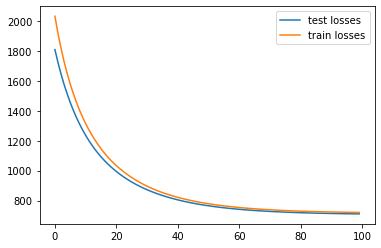

100%|██████████| 240/240 [00:00<00:00, 4356.25it/s]


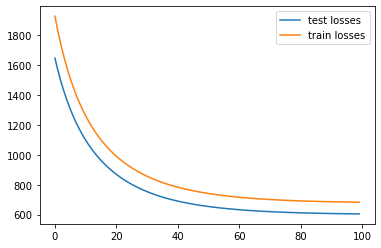

100%|██████████| 240/240 [00:00<00:00, 4451.43it/s]


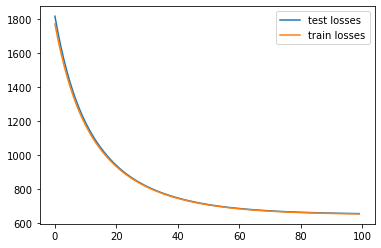

100%|██████████| 240/240 [00:00<00:00, 4221.94it/s]


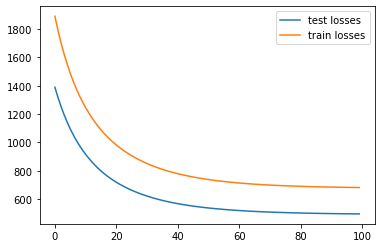

100%|██████████| 240/240 [00:00<00:00, 4425.64it/s]


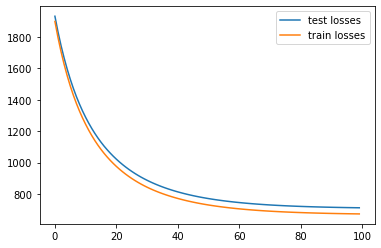

2delikatne-cut


100%|██████████| 240/240 [00:00<00:00, 4486.65it/s]


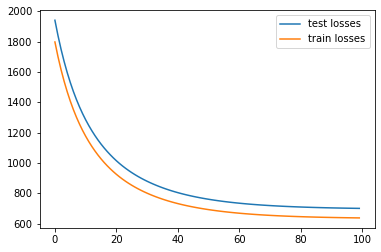

100%|██████████| 240/240 [00:00<00:00, 4355.36it/s]


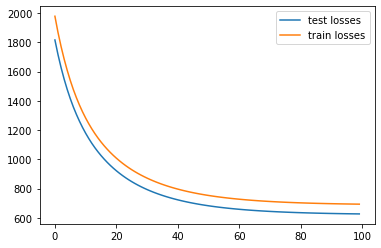

100%|██████████| 240/240 [00:00<00:00, 4381.14it/s]


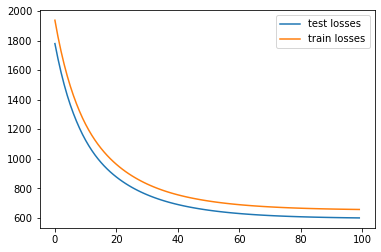

100%|██████████| 240/240 [00:00<00:00, 4410.51it/s]


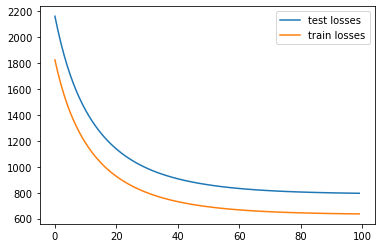

100%|██████████| 240/240 [00:00<00:00, 4242.47it/s]


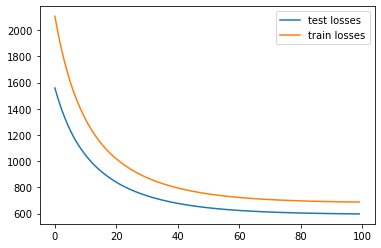

3mocniej-cut


100%|██████████| 240/240 [00:00<00:00, 3848.66it/s]


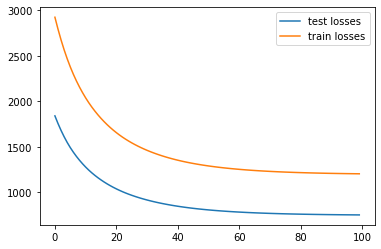

100%|██████████| 240/240 [00:00<00:00, 4094.03it/s]


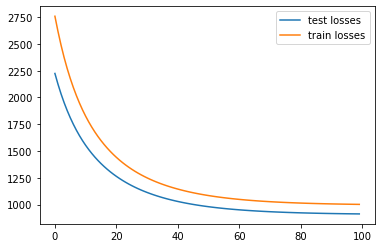

100%|██████████| 240/240 [00:00<00:00, 3845.69it/s]


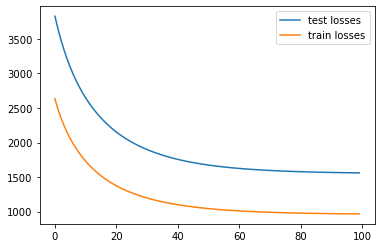

100%|██████████| 240/240 [00:00<00:00, 3975.97it/s]


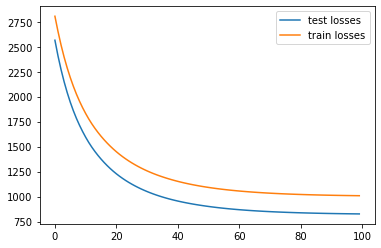

100%|██████████| 240/240 [00:00<00:00, 3881.17it/s]


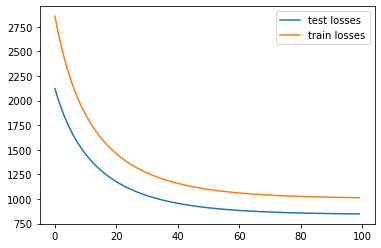

4delikatne-bezover-cut


100%|██████████| 240/240 [00:00<00:00, 4309.60it/s]


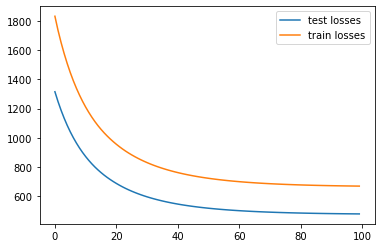

100%|██████████| 240/240 [00:00<00:00, 4505.22it/s]


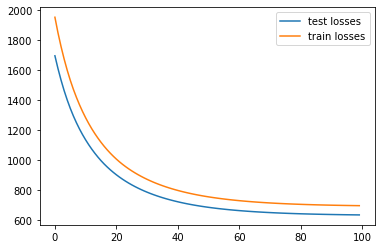

100%|██████████| 240/240 [00:00<00:00, 4092.20it/s]


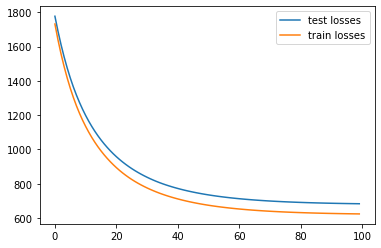

100%|██████████| 240/240 [00:00<00:00, 4283.22it/s]


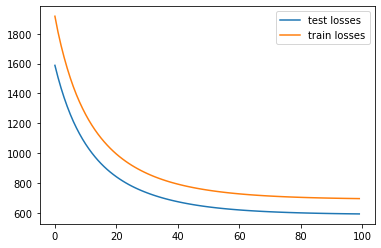

100%|██████████| 240/240 [00:00<00:00, 4264.45it/s]


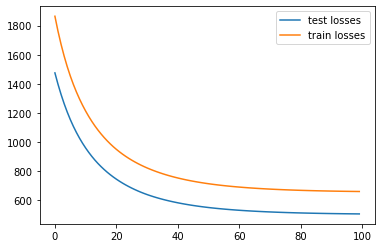

balance-scale


100%|██████████| 125/125 [00:00<00:00, 3851.80it/s]


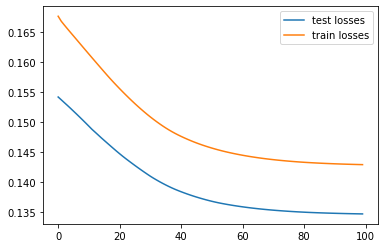

100%|██████████| 125/125 [00:00<00:00, 3849.99it/s]


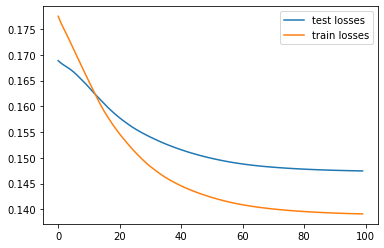

100%|██████████| 125/125 [00:00<00:00, 3850.16it/s]


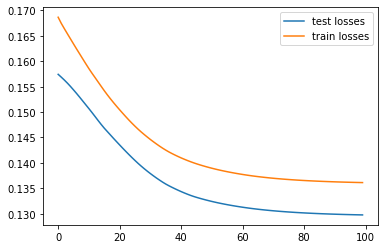

100%|██████████| 125/125 [00:00<00:00, 3652.07it/s]


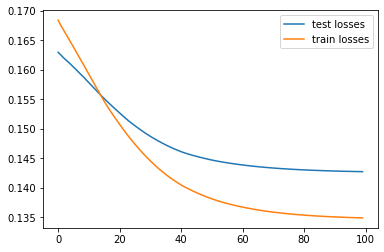

100%|██████████| 125/125 [00:00<00:00, 3519.80it/s]


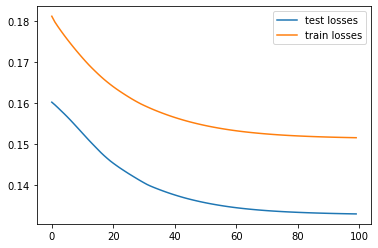

cleveland


100%|██████████| 61/61 [00:00<00:00, 3848.74it/s]


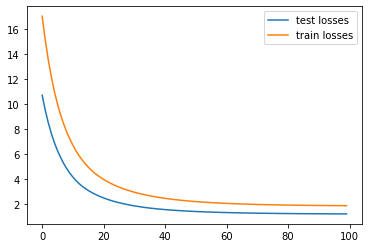

100%|██████████| 61/61 [00:00<00:00, 3243.24it/s]


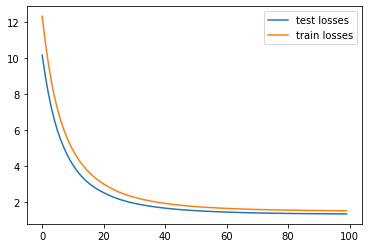

100%|██████████| 61/61 [00:00<00:00, 3501.18it/s]


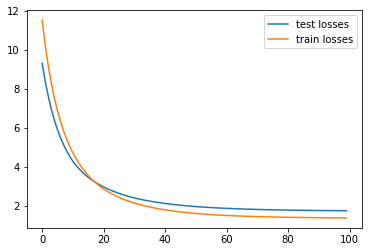

100%|██████████| 60/60 [00:00<00:00, 3794.61it/s]


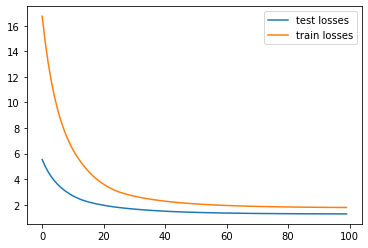

100%|██████████| 60/60 [00:00<00:00, 3995.84it/s]


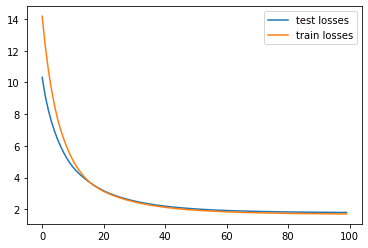

cleveland_v2


100%|██████████| 61/61 [00:00<00:00, 4173.37it/s]


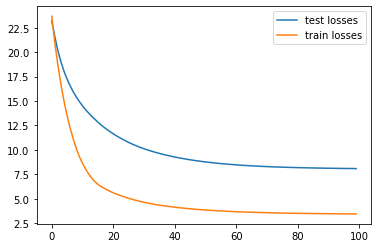

100%|██████████| 61/61 [00:00<00:00, 3778.93it/s]


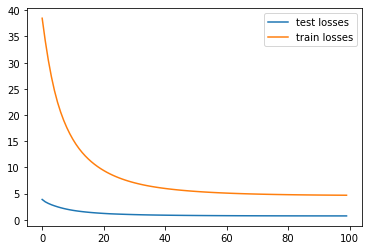

100%|██████████| 61/61 [00:00<00:00, 3775.81it/s]


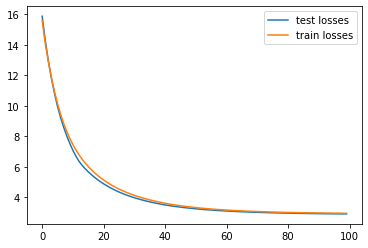

100%|██████████| 60/60 [00:00<00:00, 4044.46it/s]


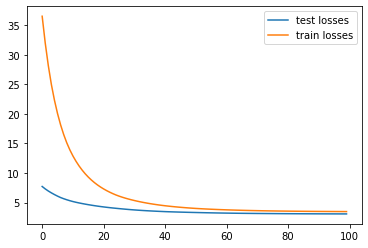

100%|██████████| 60/60 [00:00<00:00, 4033.57it/s]


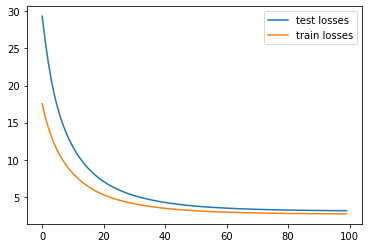

cmc


100%|██████████| 295/295 [00:00<00:00, 4035.33it/s]


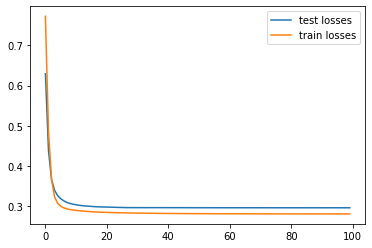

100%|██████████| 295/295 [00:00<00:00, 4463.62it/s]


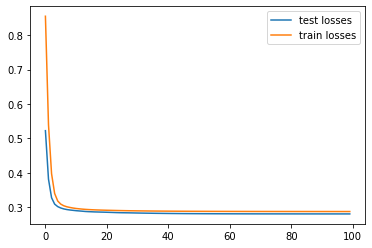

100%|██████████| 295/295 [00:00<00:00, 4341.69it/s]


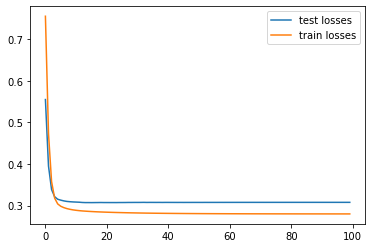

100%|██████████| 294/294 [00:00<00:00, 4541.66it/s]


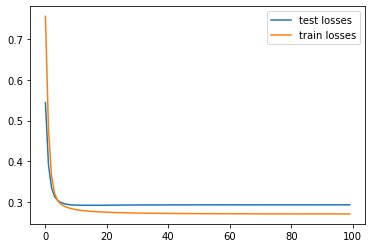

100%|██████████| 294/294 [00:00<00:00, 4245.96it/s]


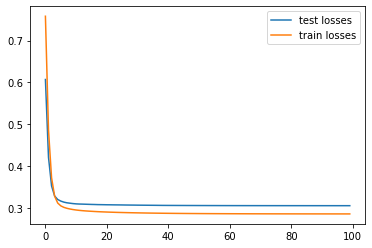

dermatology


100%|██████████| 74/74 [00:00<00:00, 3814.78it/s]


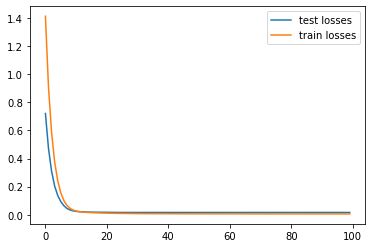

100%|██████████| 73/73 [00:00<00:00, 4221.54it/s]


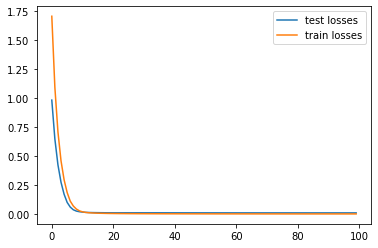

100%|██████████| 73/73 [00:00<00:00, 3776.09it/s]


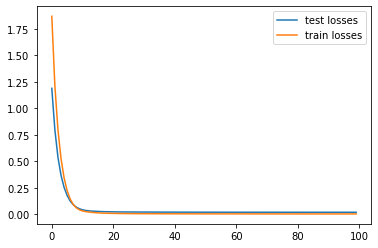

100%|██████████| 73/73 [00:00<00:00, 3604.03it/s]


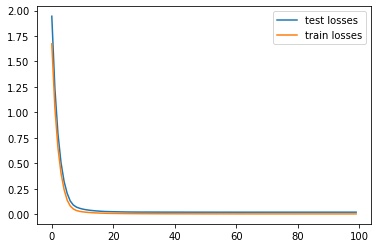

100%|██████████| 73/73 [00:00<00:00, 4432.25it/s]


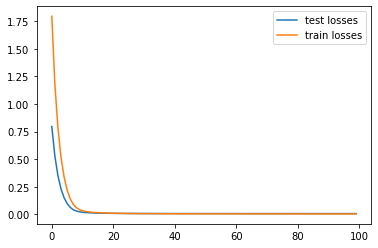

glass


100%|██████████| 43/43 [00:00<00:00, 4210.56it/s]


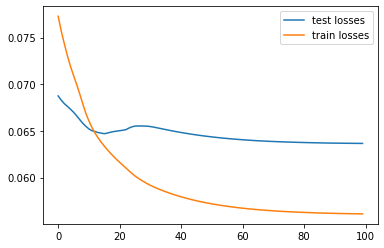

100%|██████████| 43/43 [00:00<00:00, 4259.08it/s]


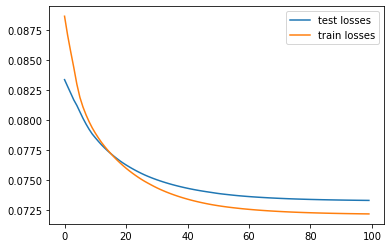

100%|██████████| 43/43 [00:00<00:00, 4173.63it/s]


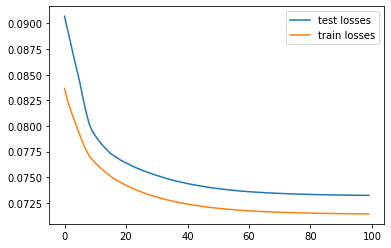

100%|██████████| 43/43 [00:00<00:00, 4014.76it/s]


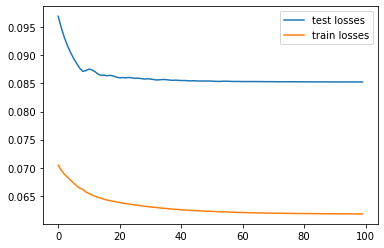

100%|██████████| 42/42 [00:00<00:00, 4178.88it/s]


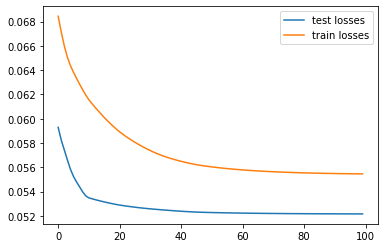

hayes-roth


100%|██████████| 32/32 [00:00<00:00, 3919.22it/s]


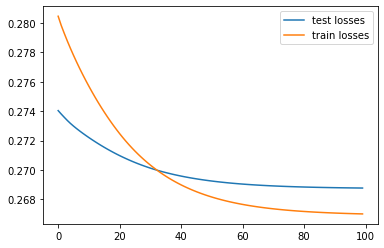

100%|██████████| 32/32 [00:00<00:00, 3629.47it/s]


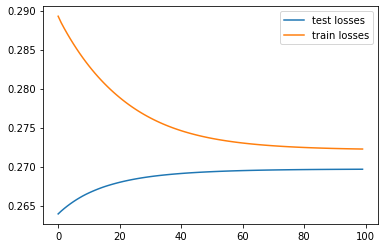

100%|██████████| 32/32 [00:00<00:00, 4221.35it/s]


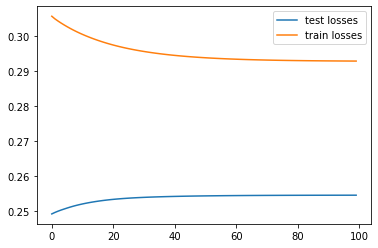

100%|██████████| 32/32 [00:00<00:00, 4144.57it/s]


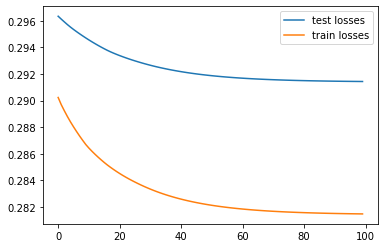

100%|██████████| 32/32 [00:00<00:00, 4076.22it/s]


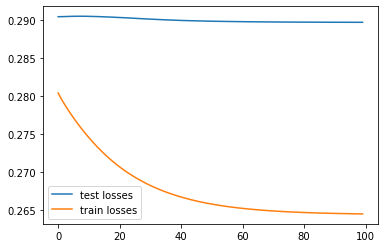

new_ecoli


100%|██████████| 68/68 [00:00<00:00, 4145.83it/s]


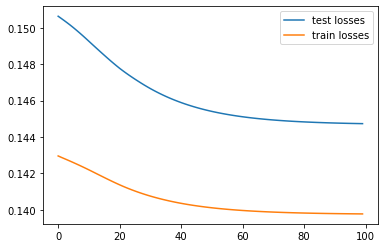

100%|██████████| 67/67 [00:00<00:00, 4236.93it/s]


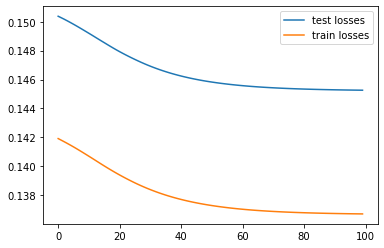

100%|██████████| 67/67 [00:00<00:00, 4283.75it/s]


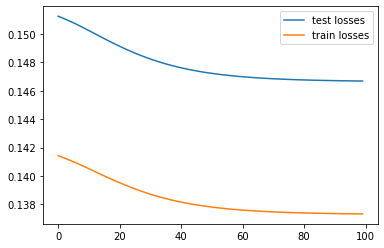

100%|██████████| 67/67 [00:00<00:00, 4096.00it/s]


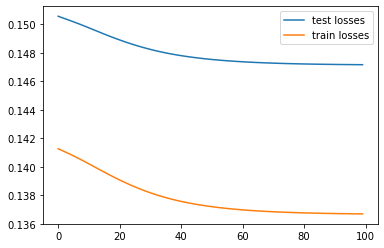

100%|██████████| 67/67 [00:00<00:00, 4032.52it/s]


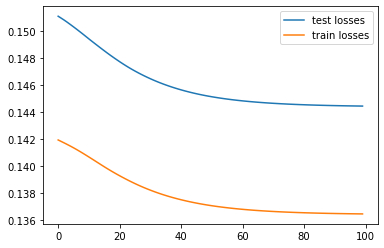

new_led7digit


100%|██████████| 100/100 [00:00<00:00, 4292.69it/s]


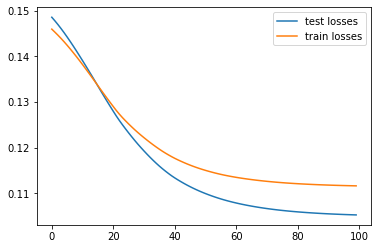

100%|██████████| 100/100 [00:00<00:00, 4114.85it/s]


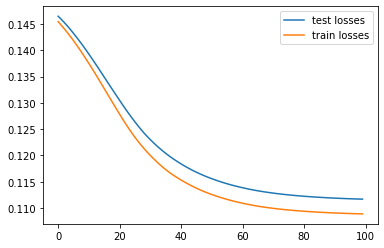

100%|██████████| 100/100 [00:00<00:00, 3838.27it/s]


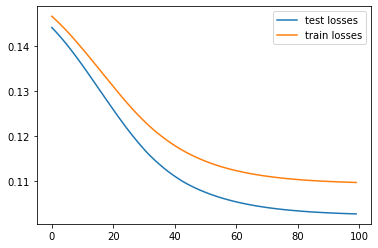

100%|██████████| 100/100 [00:00<00:00, 4295.42it/s]


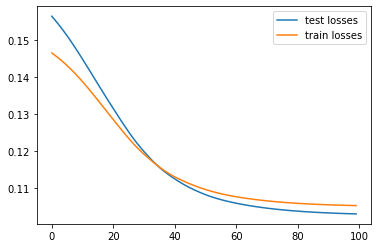

100%|██████████| 100/100 [00:00<00:00, 4433.02it/s]


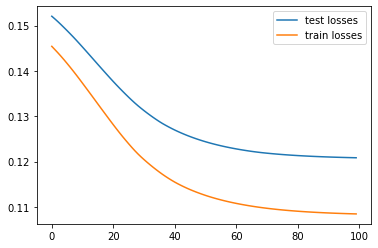

new_vehicle


100%|██████████| 170/170 [00:00<00:00, 4161.87it/s]


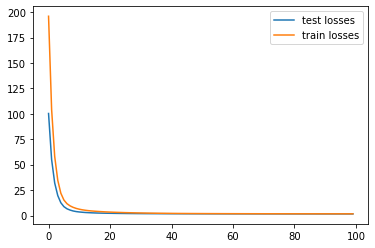

100%|██████████| 169/169 [00:00<00:00, 4285.67it/s]


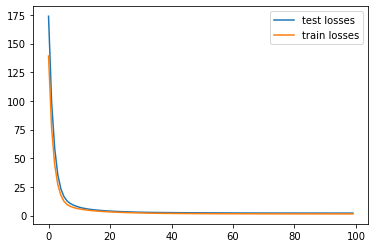

100%|██████████| 169/169 [00:00<00:00, 4133.98it/s]


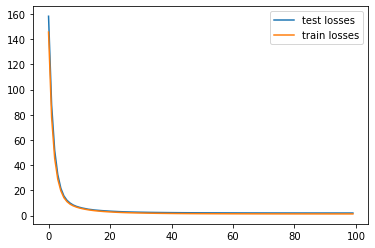

100%|██████████| 169/169 [00:00<00:00, 3825.58it/s]


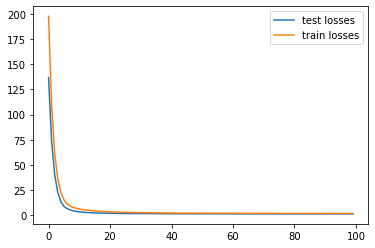

100%|██████████| 169/169 [00:00<00:00, 3502.66it/s]


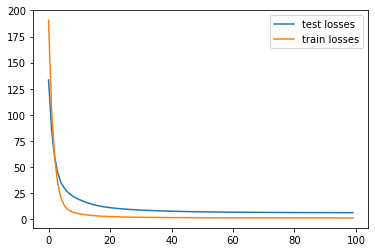

new_winequality-red


100%|██████████| 320/320 [00:00<00:00, 4318.78it/s]


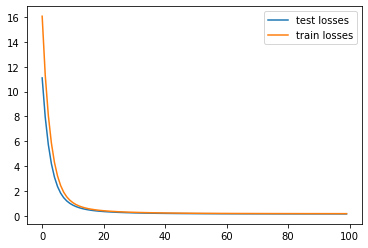

100%|██████████| 320/320 [00:00<00:00, 4389.60it/s]


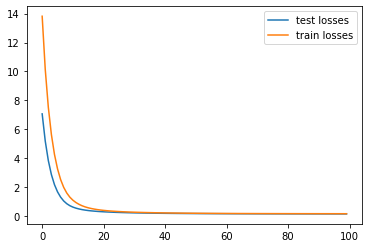

100%|██████████| 320/320 [00:00<00:00, 4437.17it/s]


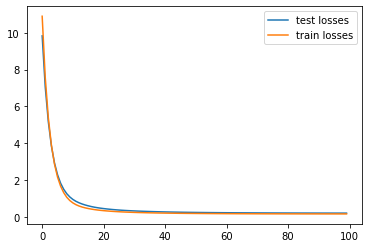

100%|██████████| 320/320 [00:00<00:00, 4022.58it/s]


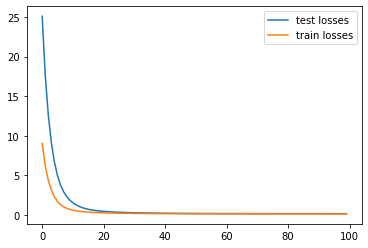

100%|██████████| 319/319 [00:00<00:00, 4264.03it/s]


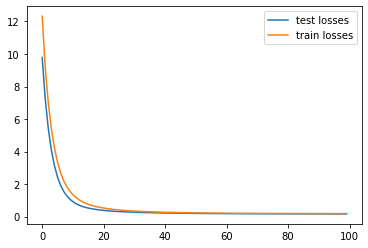

new_yeast


100%|██████████| 297/297 [00:00<00:00, 3848.59it/s]


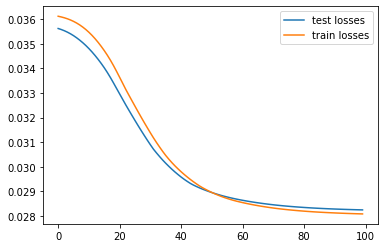

100%|██████████| 297/297 [00:00<00:00, 3776.36it/s]


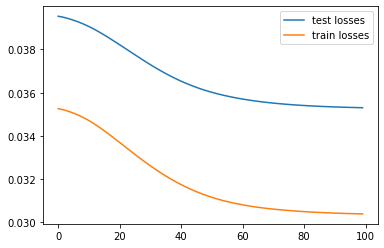

100%|██████████| 297/297 [00:00<00:00, 3647.49it/s]


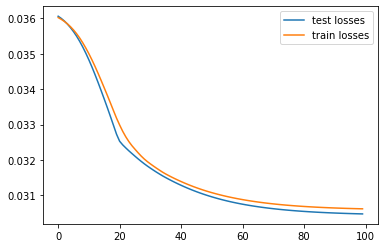

100%|██████████| 297/297 [00:00<00:00, 4478.56it/s]


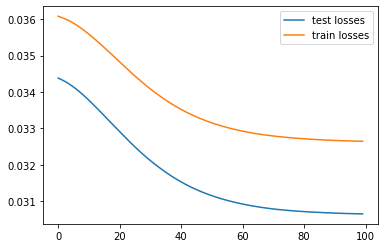

100%|██████████| 296/296 [00:00<00:00, 4263.88it/s]


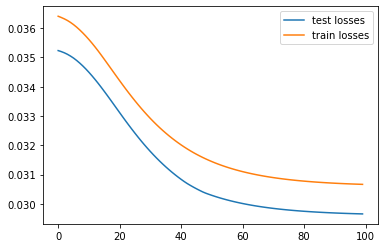

thyroid-newthyroid


100%|██████████| 43/43 [00:00<00:00, 3978.71it/s]


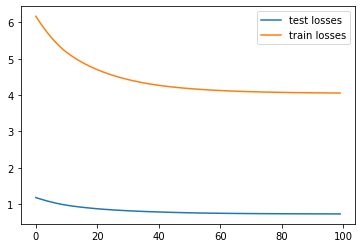

100%|██████████| 43/43 [00:00<00:00, 4276.25it/s]


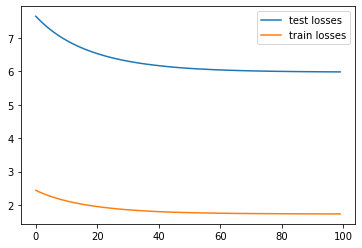

100%|██████████| 43/43 [00:00<00:00, 4187.39it/s]


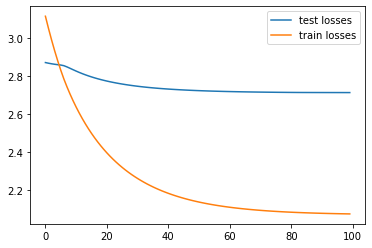

100%|██████████| 43/43 [00:00<00:00, 4239.26it/s]


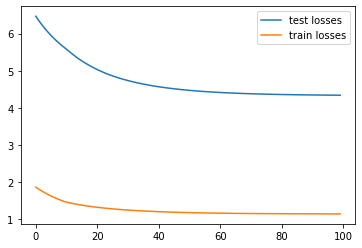

100%|██████████| 43/43 [00:00<00:00, 3970.65it/s]


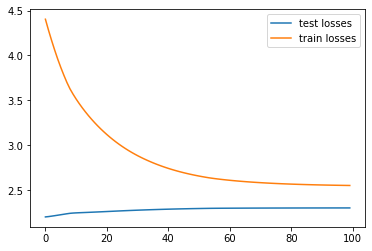

In [10]:
result_dict = defaultdict(list)

# for dataset_name in ['glass']:
for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    fold_result_dict = defaultdict(list)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train, y_train, X_test, y_test, weights,cfg)
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
            
            #f1, gmean
    # mean over folds
    # wiersze: datasety, 
    # kolumny -> klasyfikatory (przed dodaniem cech, po dodaniu, na samych nowych cechach)

In [11]:
results_df = pd.DataFrame.from_dict(result_dict)

In [12]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features
0,1czysty-cut,0.928593,0.934765,0.935490,0.936512,0.948382,0.950571,0.938205,0.938790,0.922723,0.934890,0.913816,0.916731
1,2delikatne-cut,0.757241,0.746203,0.721450,0.733821,0.760345,0.754861,0.740371,0.754287,0.759198,0.752955,0.732140,0.756780
2,3mocniej-cut,0.566813,0.522185,0.510395,0.505998,0.554225,0.493680,0.523344,0.503468,0.561191,0.493075,0.527738,0.512164
3,4delikatne-bezover-cut,0.815342,0.831648,0.797895,0.816954,0.827739,0.840448,0.816259,0.832846,0.819221,0.836346,0.797291,0.814691
4,balance-scale,0.586919,0.092880,0.565339,0.171120,0.604614,0.163098,0.629301,0.471404,0.601460,0.225784,0.592356,0.491209
5,cleveland,0.316984,0.096811,0.325690,0.183910,0.298933,0.071974,0.274962,0.109014,0.252260,0.084381,0.231346,0.069409
6,cleveland_v2,0.320120,0.055699,0.335967,0.155365,0.335418,0.075480,0.306859,0.124723,0.309706,0.053934,0.313889,0.208608
7,cmc,0.522460,0.520194,0.470766,0.473769,0.505233,0.491470,0.445270,0.443869,0.493857,0.480335,0.420762,0.415428
8,dermatology,0.969314,0.964939,0.947284,0.948507,0.947987,0.942172,0.965586,0.963143,0.940911,0.934198,0.845953,0.843656
9,glass,0.724524,0.480106,0.652585,0.453906,0.763979,0.657584,0.633911,0.493230,0.593934,0.344452,0.487354,0.217286


In [13]:
results_df.filter(regex=("dataset|RF24-f1*"))

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,1czysty-cut,0.928593,0.948382,0.922723
1,2delikatne-cut,0.757241,0.760345,0.759198
2,3mocniej-cut,0.566813,0.554225,0.561191
3,4delikatne-bezover-cut,0.815342,0.827739,0.819221
4,balance-scale,0.586919,0.604614,0.601460
5,cleveland,0.316984,0.298933,0.252260
6,cleveland_v2,0.320120,0.335418,0.309706
7,cmc,0.522460,0.505233,0.493857
8,dermatology,0.969314,0.947987,0.940911
9,glass,0.724524,0.763979,0.593934


In [14]:
results_df.filter(regex=("dataset|RF24-gmean*"))

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,1czysty-cut,0.934765,0.950571,0.934890
1,2delikatne-cut,0.746203,0.754861,0.752955
2,3mocniej-cut,0.522185,0.493680,0.493075
3,4delikatne-bezover-cut,0.831648,0.840448,0.836346
4,balance-scale,0.092880,0.163098,0.225784
5,cleveland,0.096811,0.071974,0.084381
6,cleveland_v2,0.055699,0.075480,0.053934
7,cmc,0.520194,0.491470,0.480335
8,dermatology,0.964939,0.942172,0.934198
9,glass,0.480106,0.657584,0.344452


In [15]:
results_df.filter(regex=("dataset|DT-f1*"))

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,1czysty-cut,0.935490,0.938205,0.913816
1,2delikatne-cut,0.721450,0.740371,0.732140
2,3mocniej-cut,0.510395,0.523344,0.527738
3,4delikatne-bezover-cut,0.797895,0.816259,0.797291
4,balance-scale,0.565339,0.629301,0.592356
5,cleveland,0.325690,0.274962,0.231346
6,cleveland_v2,0.335967,0.306859,0.313889
7,cmc,0.470766,0.445270,0.420762
8,dermatology,0.947284,0.965586,0.845953
9,glass,0.652585,0.633911,0.487354


In [16]:
results_df.filter(regex=("dataset|DT-gmean*"))

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,1czysty-cut,0.936512,0.938790,0.916731
1,2delikatne-cut,0.733821,0.754287,0.756780
2,3mocniej-cut,0.505998,0.503468,0.512164
3,4delikatne-bezover-cut,0.816954,0.832846,0.814691
4,balance-scale,0.171120,0.471404,0.491209
5,cleveland,0.183910,0.109014,0.069409
6,cleveland_v2,0.155365,0.124723,0.208608
7,cmc,0.473769,0.443869,0.415428
8,dermatology,0.948507,0.963143,0.843656
9,glass,0.453906,0.493230,0.217286
